In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.

#Viscosidade e densidade da água Pa.s, kg/m^3
mi = 1.002e-3
rho = 1e3

#Dados diâmetros - Incerteza tipo A
D_val = np.array([31.5, 30.8, 29.5, 29.0, 31.6, 32.1, 31.0, 31.7, 31.5, 32])/1000 #m
D = ufloat(D_val.mean(), D_val.std(ddof=1))

#Dados tempo e volumes - Incerteza tipo B
t_val = np.array([43.68, 12.36, 18.56, 20.29, 6.73, 3.30])    #s
V_val = np.array([0.490, 0.495, 1, 0.985, 0.990, 0.820])/1000 #m^3
t, V = [], []
for i in range(len(t_val)):
    t.append(ufloat(t_val[i], 0.01))
    V.append(ufloat(V_val[i], 0.01/1000)) #Convertendo o erro p/ m^3

In [2]:
V_bar, Re = [], []
for i in range(len(t_val)):
    NUM = ((V[i])/t[i]) #multipliquei por x1000 pra ficar em ml
    DEM = ((D/2)**2)*np.pi
    V_bar.append(NUM/DEM)
    Re.append(((NUM/DEM)*D*rho)/(mi))

In [3]:
df = pd.DataFrame({'D(m)':D, 't(s)':t, 'V(m^3)':V, 'V_bar(m/s)':V_bar, 'Re':Re})
#df.to_excel('dados_1.xlsx')


In [4]:
Re_n, v_b = [], []
for i in range(len(Re)):
    Re_n.append(Re[i].n)
    v_b.append(V_bar[i].n)

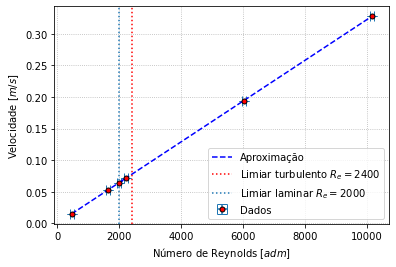

In [11]:
#Figura
fig, ax = plt.subplots()
ax.set(ylabel=r'Velocidade [$m/s$]', xlabel=r'Número de Reynolds [$adm$]')

#Erros de medida e dados
#ax.scatter(x, y, color='red', label='Dados')
erx = np.full_like(np.arange(0, len(Re), dtype=int), fill_value=Re[1].s)
ery = np.full_like(np.arange(0, len(Re), dtype=int), fill_value=V_bar[1].s)

ax.errorbar(Re_n, v_b, xerr=erx, yerr=ery, fmt='o', markeredgecolor='black', 
            markerfacecolor='red', label='Dados', markersize=5, capsize=5)
#Regressão linear dos dados
res = linregress(Re_n, v_b)
ax.plot(np.asarray(Re_n), res.intercept + res.slope*np.asarray(Re_n), linestyle='--', color='blue'
        #,label=r'Aproximação $r^2=$' + f'{res.rvalue:.4f}')
        , label='Aproximação')
ax.axvline(x=2400, ls=':', color='red',label=r'Limiar turbulento $R_e=2400$')        
ax.axvline(x=2000, ls=':',  label=r'Limiar laminar $R_e=2000$')        

ax.grid(ls='dotted')
ax.legend()

fig.savefig('velc_x_Re.pdf', bbox_inches='tight')